In [1]:
# import initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import log
from math import exp
from scipy.stats import boxcox 
from pandas import DataFrame
from pandas import Grouper
from pandas import Series
from pandas import concat
from pandas.plotting import lag_plot
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.gofplots import qqplot

In [2]:
raw_df = pd.read_csv('zillow_data.csv')

In [3]:
zip_codes = pd.read_csv('zip_codes_2019_median_inc.csv')
zip_codes['Preferred name']

0         Holtsville, NY
1         Holtsville, NY
2           Adjuntas, PR
3             Aguada, PR
4          Aguadilla, PR
              ...       
41271     Metlakatla, AK
41272    Point Baker, AK
41273      Ward Cove, AK
41274       Wrangell, AK
41275      Ketchikan, AK
Name: Preferred name, Length: 41276, dtype: object

In [4]:
zip_codes['state'] = zip_codes['Preferred name'].str.slice(-2)
zip_codes

,ZIP Code,Type,State FIPS,Preferred name,Alternate names,Population (2019),Housing units (2019),Median family income (2019),MFI percentile (2019),Latitude,Longitude,Land area,Water area,state
0,501,unique,36,"Holtsville, NY",IRS Service Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY
1,544,unique,36,"Holtsville, NY",IRS Service Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY
2,601,standard,72,"Adjuntas, PR","Colinas Del Gigante, Jard De Adjuntas, Urb San...","17,113","7,250","$16,001",0.0,18.181000,-66.750000,64.348,0.309,PR
3,602,standard,72,"Aguada, PR","Alts De Aguada, Bo Guaniquilla, Comunidad Las ...","37,751","17,538","$19,801",0.0,18.362000,-67.176003,30.613,1.718,PR
4,603,standard,72,"Aguadilla, PR","Ramey, Bda Caban, Bda Esteves, Bo Borinquen, B...","47,081","24,322","$18,973",0.0,18.455000,-67.120003,31.616,0.071,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41271,99926,PO box,2,"Metlakatla, AK",NaN,"1,654",552,"$70,455",53.0,55.138000,-131.470001,132.798,82.369,AK
41272,99927,PO box,2,"Point Baker, AK",NaN,0,54,NaN,NaN,56.238998,-133.457993,227.680,6.950,AK
41273,99928,PO box,2,"Ward Cove, AK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK
41274,99929,PO box,2,"Wrangell, AK",NaN,"2,502","1,463","$69,600",52.0,56.370998,-131.692993,999.999,246.117,AK


In [5]:
zip_codes = zip_codes[zip_codes['state']=='TX']
zip_codes = (zip_codes[zip_codes['Type'] != 'PO box'])
zip_codes

,ZIP Code,Type,State FIPS,Preferred name,Alternate names,Population (2019),Housing units (2019),Median family income (2019),MFI percentile (2019),Latitude,Longitude,Land area,Water area,state
31142,73301,unique,48,"Austin, TX",Irs Service Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
31143,73344,unique,48,"Austin, TX",Irs Service Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
31744,75001,standard,48,"Addison, TX",NaN,"14,992","9,298","$79,551",68.0,32.959999,-96.838997,3.834,0.003,TX
31745,75002,standard,48,"Allen, TX","Lucas, Parker","71,253","23,314","$105,656",88.0,33.090000,-96.609001,37.179,2.056,TX
31746,75006,standard,48,"Carrollton, TX",NaN,"51,642","19,178","$72,325",57.0,32.962002,-96.899002,16.875,0.254,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34257,79961,unique,48,"El Paso, TX",El Paso Water Utilities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
34258,79968,unique,48,"El Paso, TX",Univ Of Tx Elp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
34259,79976,unique,48,"El Paso, TX",Southern Union Gas Co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX
34260,79978,unique,48,"El Paso, TX",El Paso Natural Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX


In [6]:
raw_df.drop(raw_df.columns[np.r_[0, 4, 6:100]], axis=1, inplace=True)

In [7]:
raw_df = raw_df[raw_df['State'] == 'TX']

In [8]:
raw_df

,RegionName,City,State,CountyName,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1,75070,McKinney,TX,Collin,187700.0,188800.0,190300.0,191800.0,193000.0,193900.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Harris,231800.0,233100.0,233500.0,233000.0,232100.0,231300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
4,79936,El Paso,TX,El Paso,84000.0,84700.0,85500.0,86400.0,87200.0,88000.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,77084,Houston,TX,Harris,119400.0,120400.0,121200.0,121900.0,122400.0,122700.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
8,77449,Katy,TX,Harris,123900.0,125300.0,126600.0,127500.0,128100.0,128500.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14372,76941,Mertzon,TX,Irion,NaN,NaN,NaN,NaN,NaN,NaN,...,122500,121800,121600,122200,123500,124700,124300,122600,121600,121600
14472,79313,Anton,TX,Hockley,NaN,NaN,NaN,NaN,NaN,NaN,...,55400,56300,55700,56300,58900,61500,63000,63600,63500,63300
14492,79355,Plains,TX,Yoakum,NaN,NaN,NaN,NaN,NaN,NaN,...,100500,100500,101000,100700,99700,97700,95800,94600,94000,93500
14599,79366,Ransom Canyon,TX,Lubbock,161900.0,162300.0,162700.0,163100.0,163400.0,163600.0,...,252100,251600,251600,251500,251300,251500,251700,252500,255000,257500


In [9]:
raw_df.quantile(.25)

RegionName     76021.0
2004-01        78700.0
2004-02        79300.0
2004-03        80100.0
2004-04        80700.0
                ...   
2017-12       112700.0
2018-01       113000.0
2018-02       113900.0
2018-03       115000.0
2018-04       115400.0
Name: 0.25, Length: 173, dtype: float64

In [10]:
#Calculate historical return on investment
raw_df['ROI']= (raw_df['2018-04']/raw_df['2004-01'])-1
raw_df['ROI']


#Calculate standard deviation of monthly values
raw_df['std']=raw_df.loc[:,'2004-01':'2018-04'].std(skipna=True, axis=1)

#Calculate historical mean value
raw_df['mean']=raw_df.loc[:,'2004-01':'2018-04'].mean(skipna=True, axis=1)

#Calculate coefficient of variance
raw_df['CV']=raw_df['std']/raw_df['mean']

#Show calculated values
raw_df[['RegionName','std','mean','ROI','CV']].head()

#Descriptive statistics of coefficients of variance.
print(raw_df.CV.describe())

#Define upper limit of CV according to risk profile.
upper_cv = raw_df.CV.quantile(.6)
print(f'\nCV upper limit: {upper_cv}')

#Get the 5 zipcodes with highest ROIs within the firms risk profile.
zc_best5 = raw_df[raw_df['CV']<upper_cv].sort_values('ROI',axis=0,ascending=False)[:5]
print('\n Best 5 Zipcodes:')
zc_best5[['RegionName','ROI','CV']]

count    989.000000
mean       0.121449
std        0.036183
min        0.019827
25%        0.098176
50%        0.120857
75%        0.142168
max        0.293064
Name: CV, dtype: float64

CV upper limit: 0.12848011113068844

 Best 5 Zipcodes:


,RegionName,ROI,CV
9851,76050,0.943470,0.117471
7776,78204,0.848754,0.119656
11091,77514,0.845737,0.126108
2901,77550,0.843943,0.120857
4807,79602,0.830396,0.124068


In [11]:
raw_df

,RegionName,City,State,CountyName,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV
1,75070,McKinney,TX,Collin,187700.0,188800.0,190300.0,191800.0,193000.0,193900.0,...,315000,316600,318100,319600,321100,321800,0.714438,38257.775512,227040.116279,0.168507
2,77494,Katy,TX,Harris,231800.0,233100.0,233500.0,233000.0,232100.0,231300.0,...,320800,321200,321200,323000,326900,329900,0.423210,33208.367605,266633.139535,0.124547
4,79936,El Paso,TX,El Paso,84000.0,84700.0,85500.0,86400.0,87200.0,88000.0,...,120300,120300,120300,120500,121000,121500,0.446429,10248.462666,113729.651163,0.090112
5,77084,Houston,TX,Harris,119400.0,120400.0,121200.0,121900.0,122400.0,122700.0,...,162800,162800,162800,162900,163500,164300,0.376047,14170.210695,130143.604651,0.108881
8,77449,Katy,TX,Harris,123900.0,125300.0,126600.0,127500.0,128100.0,128500.0,...,170900,172300,173300,174200,175400,176200,0.422115,16508.811448,134945.348837,0.122337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14372,76941,Mertzon,TX,Irion,NaN,NaN,NaN,NaN,NaN,NaN,...,123500,124700,124300,122600,121600,121600,NaN,13734.029878,99318.367347,0.138283
14472,79313,Anton,TX,Hockley,NaN,NaN,NaN,NaN,NaN,NaN,...,58900,61500,63000,63600,63500,63300,NaN,5286.674724,54424.675325,0.097137
14492,79355,Plains,TX,Yoakum,NaN,NaN,NaN,NaN,NaN,NaN,...,99700,97700,95800,94600,94000,93500,NaN,12929.465872,78967.346939,0.163732
14599,79366,Ransom Canyon,TX,Lubbock,161900.0,162300.0,162700.0,163100.0,163400.0,163600.0,...,251300,251500,251700,252500,255000,257500,0.590488,25909.956515,189098.837209,0.137018


In [12]:
#from sklearn.impute import SimpleImputer

#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

#texas = imp_mean.fit_transform(texas)

#texas 

In [13]:
def melt_data(raw_df):
    melted = pd.melt(raw_df, id_vars=['RegionName', 'City', 'CountyName', 'ROI', 'State', 'std', 'mean', 'CV'], var_name='date')
    melted['date'] = pd.to_datetime(melted['date'], infer_datetime_format=True)
    melted['year'] = [d.year for d in melted.date]
    melted = melted.dropna(subset=['value'])
    return melted

In [14]:
df = melt_data(raw_df)
df

,RegionName,City,CountyName,ROI,State,std,mean,CV,date,value,year
0,75070,McKinney,Collin,0.714438,TX,38257.775512,227040.116279,0.168507,2004-01-01,187700.0,2004
1,77494,Katy,Harris,0.423210,TX,33208.367605,266633.139535,0.124547,2004-01-01,231800.0,2004
2,79936,El Paso,El Paso,0.446429,TX,10248.462666,113729.651163,0.090112,2004-01-01,84000.0,2004
3,77084,Houston,Harris,0.376047,TX,14170.210695,130143.604651,0.108881,2004-01-01,119400.0,2004
4,77449,Katy,Harris,0.422115,TX,16508.811448,134945.348837,0.122337,2004-01-01,123900.0,2004
...,...,...,...,...,...,...,...,...,...,...,...
170103,76941,Mertzon,Irion,NaN,TX,13734.029878,99318.367347,0.138283,2018-04-01,121600.0,2018
170104,79313,Anton,Hockley,NaN,TX,5286.674724,54424.675325,0.097137,2018-04-01,63300.0,2018
170105,79355,Plains,Yoakum,NaN,TX,12929.465872,78967.346939,0.163732,2018-04-01,93500.0,2018
170106,79366,Ransom Canyon,Lubbock,0.590488,TX,25909.956515,189098.837209,0.137018,2018-04-01,257500.0,2018


In [15]:
df.set_index(df['date'], inplace = True)
df.drop('date',axis=1, inplace=True)
df

,RegionName,City,CountyName,ROI,State,std,mean,CV,value,year
date,,,,,,,,,,
2004-01-01,75070,McKinney,Collin,0.714438,TX,38257.775512,227040.116279,0.168507,187700.0,2004
2004-01-01,77494,Katy,Harris,0.423210,TX,33208.367605,266633.139535,0.124547,231800.0,2004
2004-01-01,79936,El Paso,El Paso,0.446429,TX,10248.462666,113729.651163,0.090112,84000.0,2004
2004-01-01,77084,Houston,Harris,0.376047,TX,14170.210695,130143.604651,0.108881,119400.0,2004
2004-01-01,77449,Katy,Harris,0.422115,TX,16508.811448,134945.348837,0.122337,123900.0,2004
...,...,...,...,...,...,...,...,...,...,...
2018-04-01,76941,Mertzon,Irion,NaN,TX,13734.029878,99318.367347,0.138283,121600.0,2018
2018-04-01,79313,Anton,Hockley,NaN,TX,5286.674724,54424.675325,0.097137,63300.0,2018
2018-04-01,79355,Plains,Yoakum,NaN,TX,12929.465872,78967.346939,0.163732,93500.0,2018


In [16]:
# Select the first quantile
q1 = df['value'].quantile(.25)

# Select the third quantile
q3 = df['value'].quantile(.75)


# Create a filtered in between q1 & q3
filtered =df[(df['value']>=q1) 
             & (df['value']<=q3)]
filtered

,RegionName,City,CountyName,ROI,State,std,mean,CV,value,year
date,,,,,,,,,,
2004-01-01,77084,Houston,Harris,0.376047,TX,14170.210695,130143.604651,0.108881,119400.0,2004
2004-01-01,77449,Katy,Harris,0.422115,TX,16508.811448,134945.348837,0.122337,123900.0,2004
2004-01-01,78660,Pflugerville,Travis,0.578674,TX,23031.089035,180093.023256,0.127884,153800.0,2004
2004-01-01,77573,League City,Galveston,0.568086,TX,23867.673325,199441.279070,0.119673,166700.0,2004
2004-01-01,79912,El Paso,El Paso,0.476452,TX,13149.347629,171614.534884,0.076621,127400.0,2004
...,...,...,...,...,...,...,...,...,...,...
2018-04-01,76064,Maypearl,Ellis,0.659048,TX,15308.985812,136593.604651,0.112077,174200.0,2018
2018-04-01,77577,Liverpool,Brazoria,0.761511,TX,17597.138719,108870.348837,0.161634,149200.0,2018
2018-04-01,77663,Kountze,Hardin,0.312721,TX,11184.253614,131325.581395,0.085164,148600.0,2018


In [30]:
df = filtered.merge(zip_codes, left_on='RegionName', right_on='ZIP Code')
df

,RegionName,City,CountyName,ROI,State,std,mean,CV,value,year,...,Alternate names,Population (2019),Housing units (2019),Median family income (2019),MFI percentile (2019),Latitude,Longitude,Land area,Water area,state
0,77084,Houston,Harris,0.376047,TX,14170.210695,130143.604651,0.108881,119400.0,2004,...,Addicks Barker,"107,673","37,968","$70,460",53.0,29.827,-95.660004,30.637,0.122,TX
1,77084,Houston,Harris,0.376047,TX,14170.210695,130143.604651,0.108881,120400.0,2004,...,Addicks Barker,"107,673","37,968","$70,460",53.0,29.827,-95.660004,30.637,0.122,TX
2,77084,Houston,Harris,0.376047,TX,14170.210695,130143.604651,0.108881,121200.0,2004,...,Addicks Barker,"107,673","37,968","$70,460",53.0,29.827,-95.660004,30.637,0.122,TX
3,77084,Houston,Harris,0.376047,TX,14170.210695,130143.604651,0.108881,121900.0,2004,...,Addicks Barker,"107,673","37,968","$70,460",53.0,29.827,-95.660004,30.637,0.122,TX
4,77084,Houston,Harris,0.376047,TX,14170.210695,130143.604651,0.108881,122400.0,2004,...,Addicks Barker,"107,673","37,968","$70,460",53.0,29.827,-95.660004,30.637,0.122,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83097,77029,Houston,Harris,0.495098,TX,6537.458913,70983.139535,0.092099,91500.0,2018,...,Jacinto City,"17,781","6,496","$41,752",7.0,29.760,-95.255997,12.977,0.394,TX
83098,78061,Pearsall,Frio,0.131105,TX,9101.277478,68872.093023,0.132148,87600.0,2018,...,Frio Town,"12,858","3,894","$53,737",22.0,28.888,-99.140999,553.178,0.522,TX
83099,78061,Pearsall,Frio,0.131105,TX,9101.277478,68872.093023,0.132148,88200.0,2018,...,Frio Town,"12,858","3,894","$53,737",22.0,28.888,-99.140999,553.178,0.522,TX
83100,78061,Pearsall,Frio,0.131105,TX,9101.277478,68872.093023,0.132148,88000.0,2018,...,Frio Town,"12,858","3,894","$53,737",22.0,28.888,-99.140999,553.178,0.522,TX


In [31]:
df = pd.DataFrame(filtered)
df['RegionName']

date
2004-01-01    77084
2004-01-01    77449
2004-01-01    78660
2004-01-01    77573
2004-01-01    79912
              ...  
2018-04-01    76064
2018-04-01    77577
2018-04-01    77663
2018-04-01    76941
2018-04-01    79355
Name: RegionName, Length: 83728, dtype: int64

In [32]:
df_prices = pd.DataFrame(df['value'], index = df.index)
df_prices

,value
date,
2004-01-01,119400.0
2004-01-01,123900.0
2004-01-01,153800.0
2004-01-01,166700.0
2004-01-01,127400.0
...,...
2018-04-01,174200.0
2018-04-01,149200.0
2018-04-01,148600.0


<AxesSubplot:xlabel='date'>

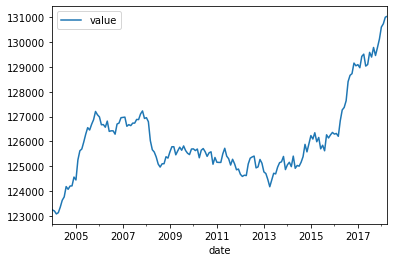

In [33]:
avg_prices = df_prices.groupby('date').aggregate({'value':'mean'})
avg_prices.plot()

<AxesSubplot:xlabel='date'>

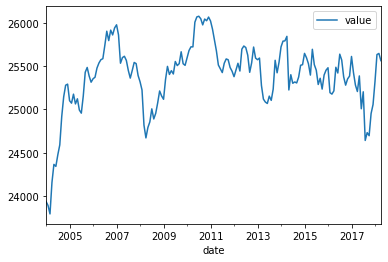

In [34]:
std_prices = df_prices.groupby('date').aggregate({'value':'std'})
std_prices.plot()

<AxesSubplot:xlabel='date'>

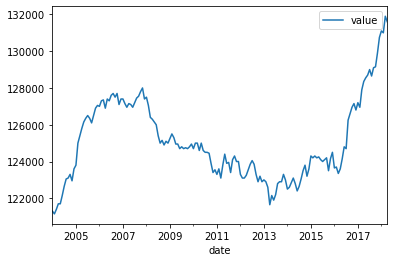

In [35]:
med_prices = df_prices.groupby('date').aggregate({'value':'median'})
med_prices.plot()

In [36]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(df):
    roll_mean = df.rolling(window=12, center=False).mean()
    roll_std = df.rolling(window=12, center=False).std()
    
    df_test = adfuller(df)
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in df_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    roll_mean.plot()
    roll_std.plot()
    return df_test

In [37]:
#results = stationarity_check(df_prices)
#results

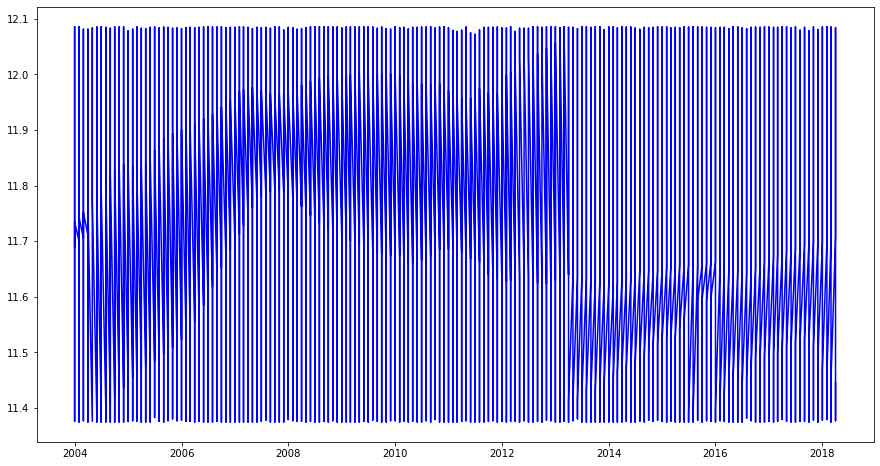

In [38]:
df_log = np.log(df_prices)
fig = plt.figure(figsize=(15,8))
plt.plot(df_log, color='blue');

<AxesSubplot:xlabel='date'>

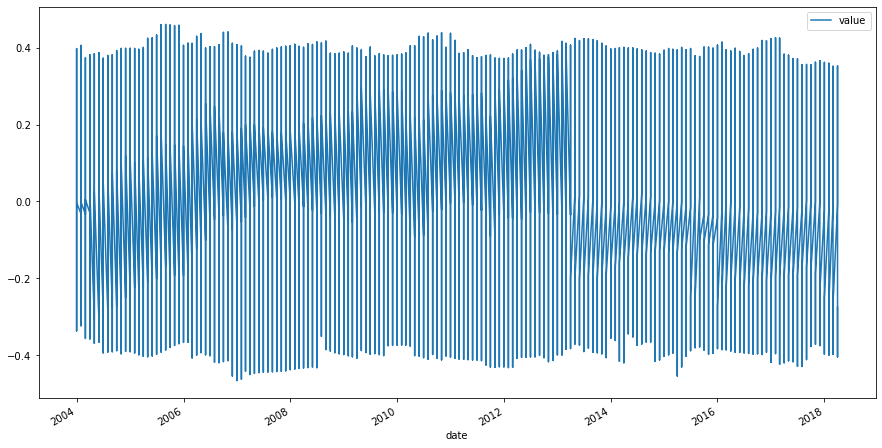

In [39]:
weight_roll_mean = df_log.ewm(halflife=4).mean()
df_log_wrm = df_log - weight_roll_mean
df_log_wrm.plot(figsize=(15,8))

In [40]:
type(df_log_wrm.index)


pandas.core.indexes.datetimes.DatetimeIndex

In [41]:
from statsmodels.tsa.arima.model import ARIMA

mod = ARIMA(df_log_wrm, order=(1, 0, 0))
res = mod.fit()
print(res.summary())

/Users/rashidkarriti/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/rashidkarriti/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/rashidkarriti/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                83728
Model:                 ARIMA(1, 0, 0)   Log Likelihood               28728.808
Date:                Tue, 05 Oct 2021   AIC                         -57451.616
Time:                        11:18:16   BIC                         -57423.610
Sample:                             0   HQIC                        -57443.048
                              - 83728                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.057e-06      0.001     -0.011      0.991      -0.001       0.001
ar.L1         -0.0765      0.003    -22.513      0.000      -0.083      -0.070
sigma2         0.0295      0.000    157.017      0.0

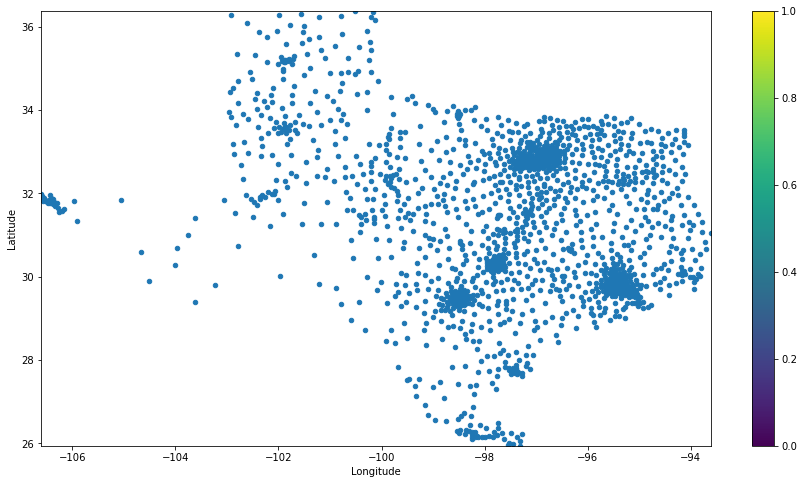

In [42]:
fig, ax = plt.subplots()

cmap = sns.cubehelix_palette(as_cmap=True)
points = ax.scatter(zip_codes['Longitude'], zip_codes['Latitude'], s=20, cmap='Blues')


ax.set_xlim((zip_codes['Longitude'].min(), zip_codes['Longitude'].max()))
ax.set_ylim((zip_codes['Latitude'].min(), zip_codes['Latitude'].max()))
fig.colorbar(points)
fig.set_size_inches(15,8)
plt.xlabel("Longitude")
plt.ylabel("Latitude");